In [1]:
import torch
from spikingjelly.activation_based import neuron
from spikingjelly import visualizing
from matplotlib import pyplot as plt

In [2]:
if_layer = neuron.IFNode()
print(if_layer.v)

0.0


In [3]:
x = torch.rand(size=[2, 3])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])
if_layer.reset()

x = torch.rand(size=[4, 5, 6])
if_layer(x)
print(f'x.shape={x.shape}, if_layer.v.shape={if_layer.v.shape}')
# x.shape=torch.Size([4, 5, 6]), if_layer.v.shape=torch.Size([4, 5, 6])
if_layer.reset()

x.shape=torch.Size([2, 3]), if_layer.v.shape=torch.Size([2, 3])
x.shape=torch.Size([4, 5, 6]), if_layer.v.shape=torch.Size([4, 5, 6])


[tensor([0.0200]), tensor([0.0400]), tensor([0.0600]), tensor([0.0800]), tensor([0.1000]), tensor([0.1200]), tensor([0.1400]), tensor([0.1600]), tensor([0.1800]), tensor([0.2000]), tensor([0.2200]), tensor([0.2400]), tensor([0.2600]), tensor([0.2800]), tensor([0.3000]), tensor([0.3200]), tensor([0.3400]), tensor([0.3600]), tensor([0.3800]), tensor([0.4000]), tensor([0.4200]), tensor([0.4400]), tensor([0.4600]), tensor([0.4800]), tensor([0.5000]), tensor([0.5200]), tensor([0.5400]), tensor([0.5600]), tensor([0.5800]), tensor([0.6000]), tensor([0.6200]), tensor([0.6400]), tensor([0.6600]), tensor([0.6800]), tensor([0.7000]), tensor([0.7200]), tensor([0.7400]), tensor([0.7600]), tensor([0.7800]), tensor([0.8000]), tensor([0.8200]), tensor([0.8400]), tensor([0.8600]), tensor([0.8800]), tensor([0.9000]), tensor([0.9200]), tensor([0.9400]), tensor([0.9600]), tensor([0.9800]), tensor([1.0000]), tensor([0.]), tensor([0.0200]), tensor([0.0400]), tensor([0.0600]), tensor([0.0800]), tensor([0.100

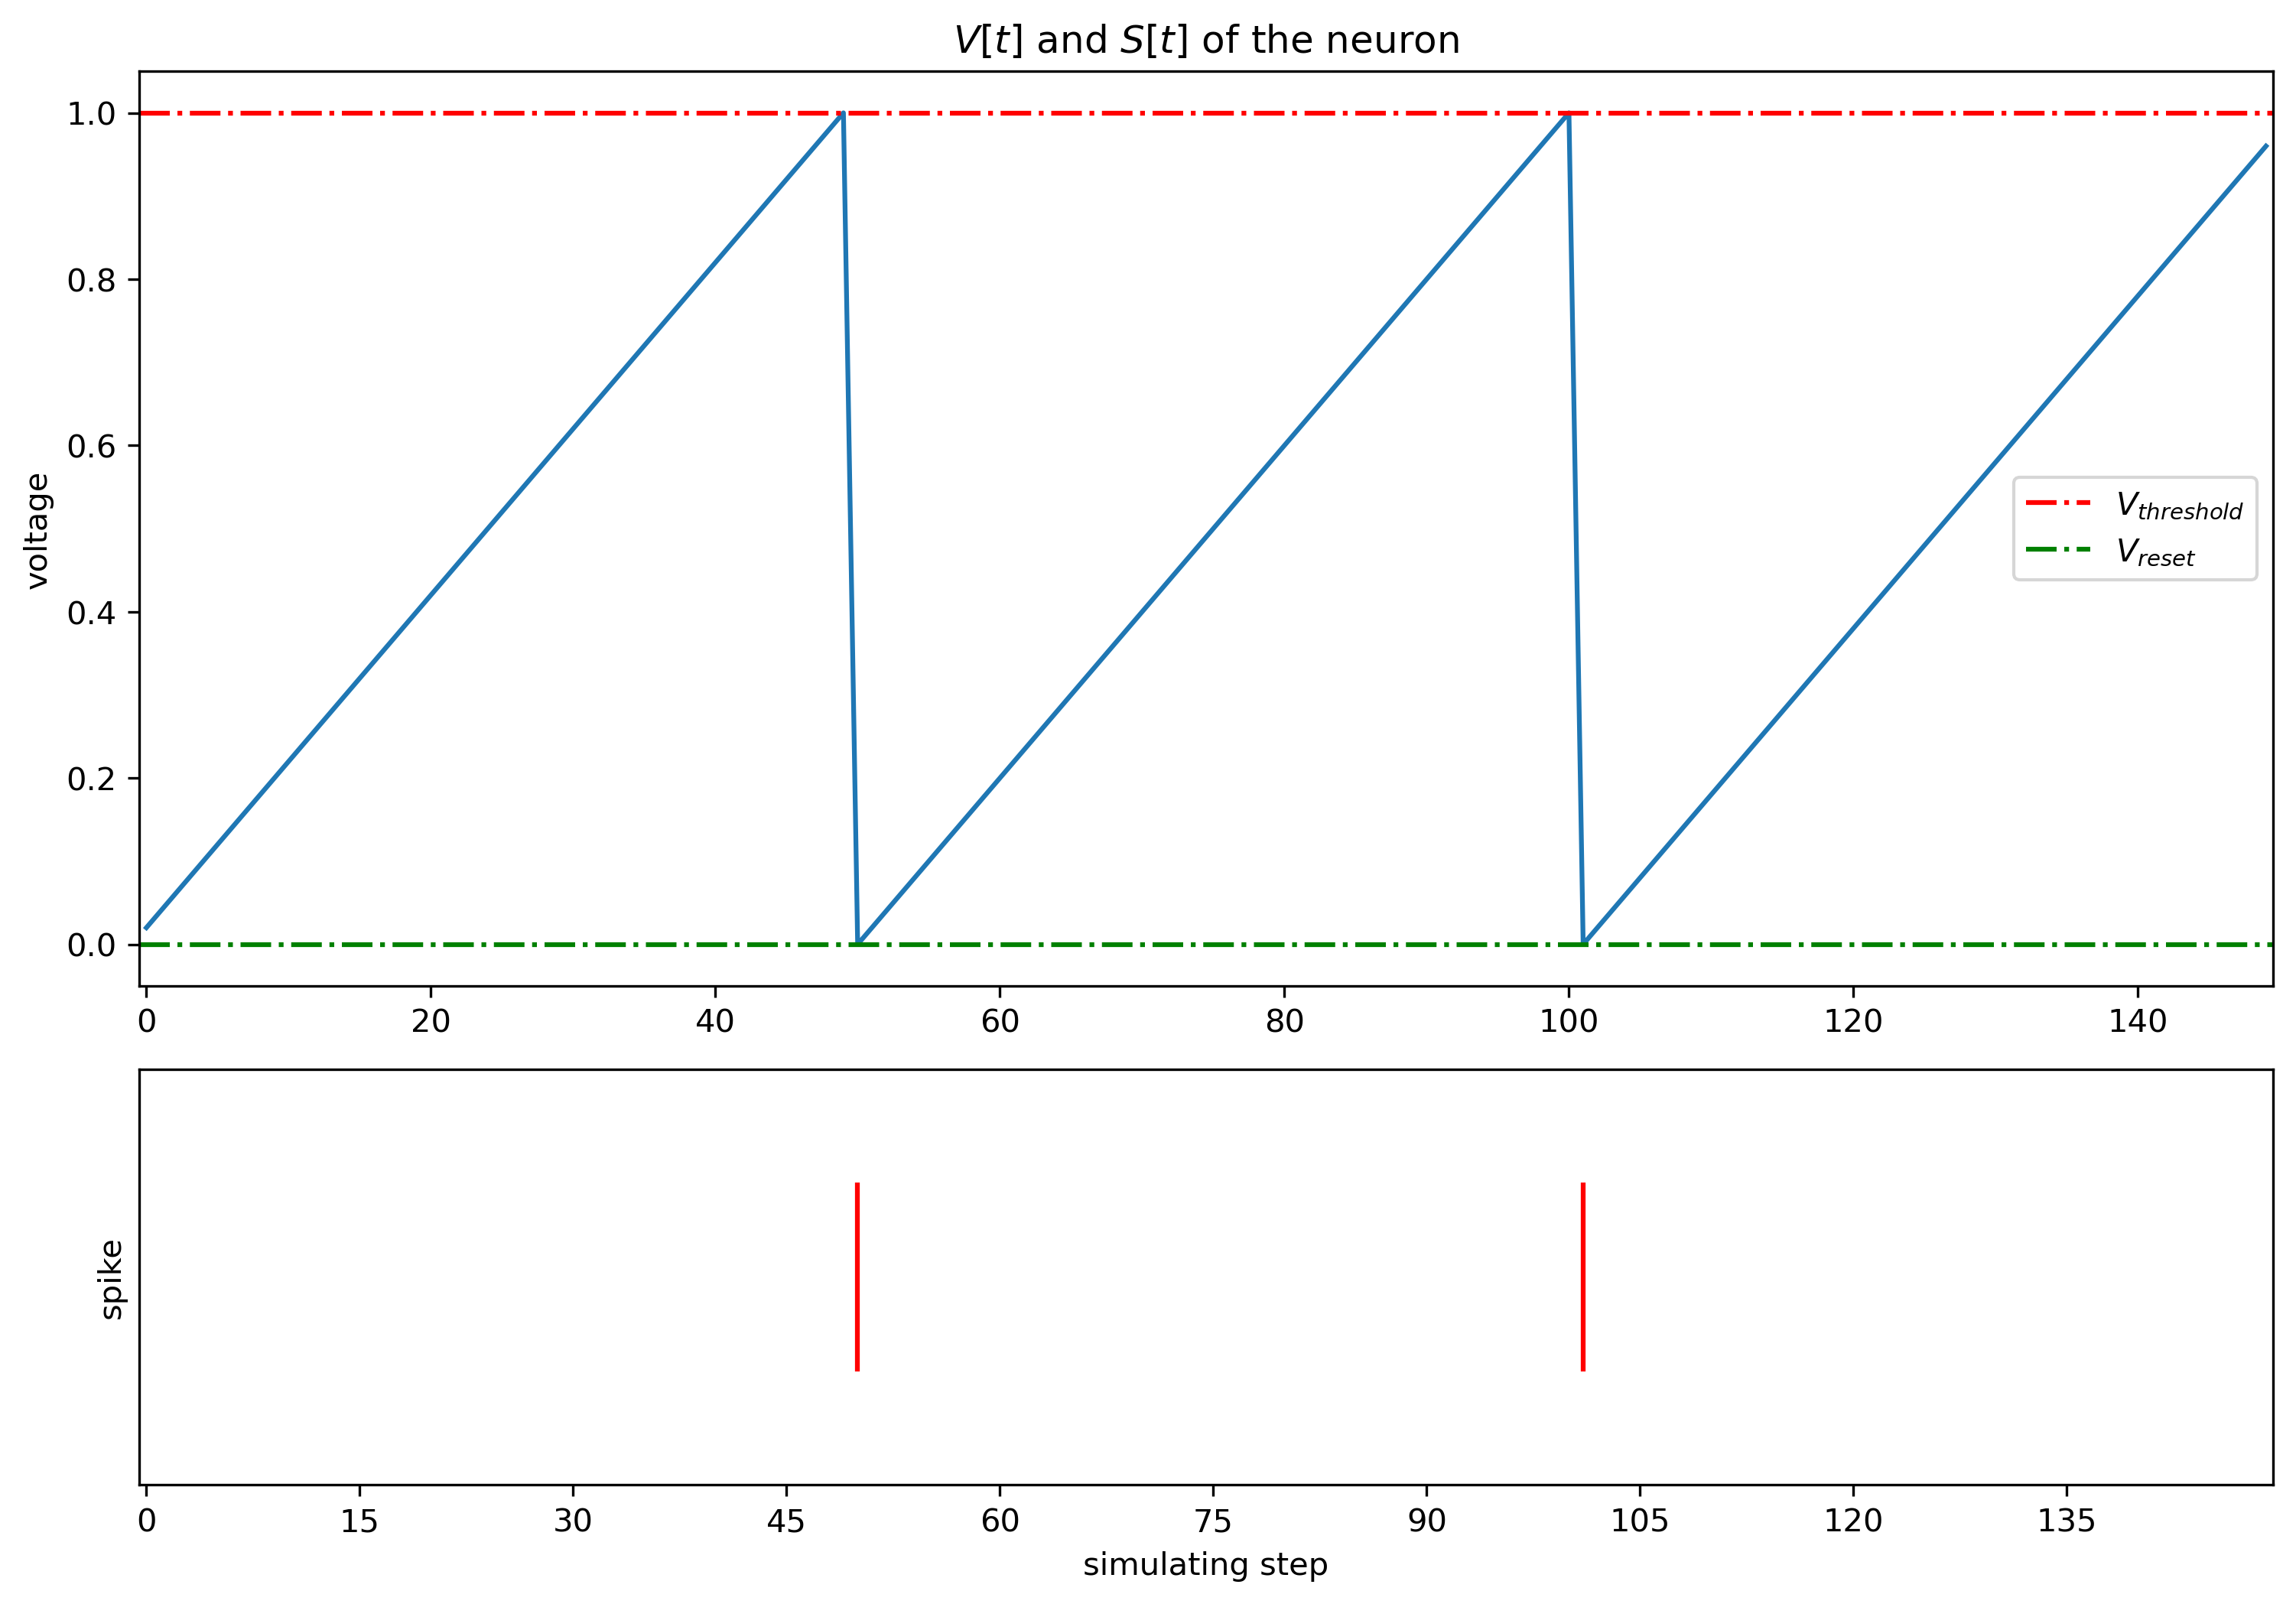

In [4]:
if_layer.reset()
x = torch.as_tensor([0.02])
T = 150
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x))
    v_list.append(if_layer.v)

dpi = 300
figsize = (12, 8)
print(v_list,torch.cat(v_list))
visualizing.plot_one_neuron_v_s(torch.cat(v_list).numpy(), torch.cat(s_list).numpy(), v_threshold=if_layer.v_threshold,
                                v_reset=if_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()

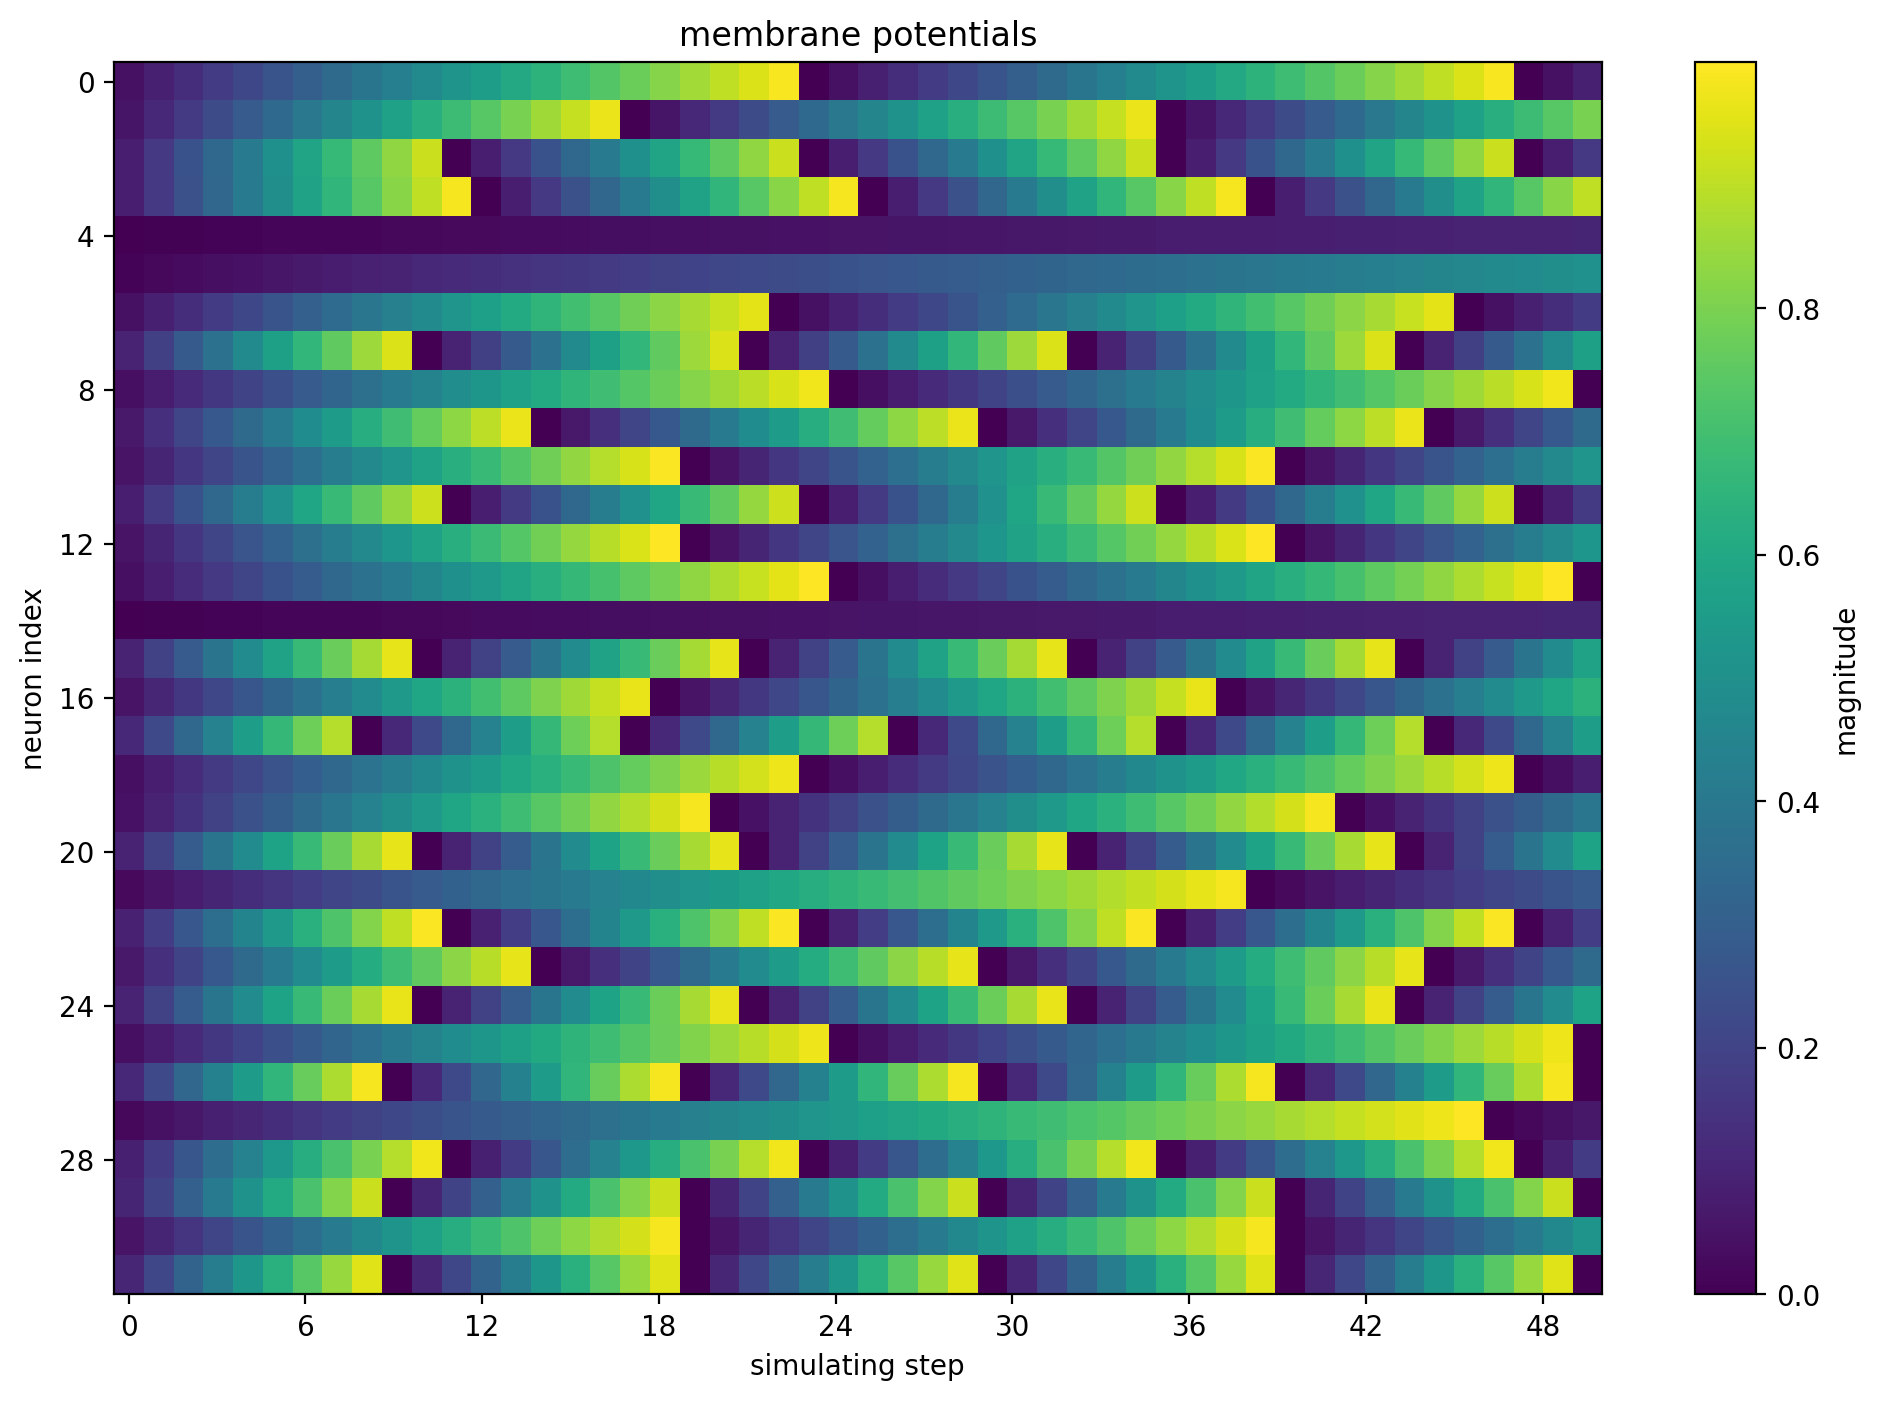

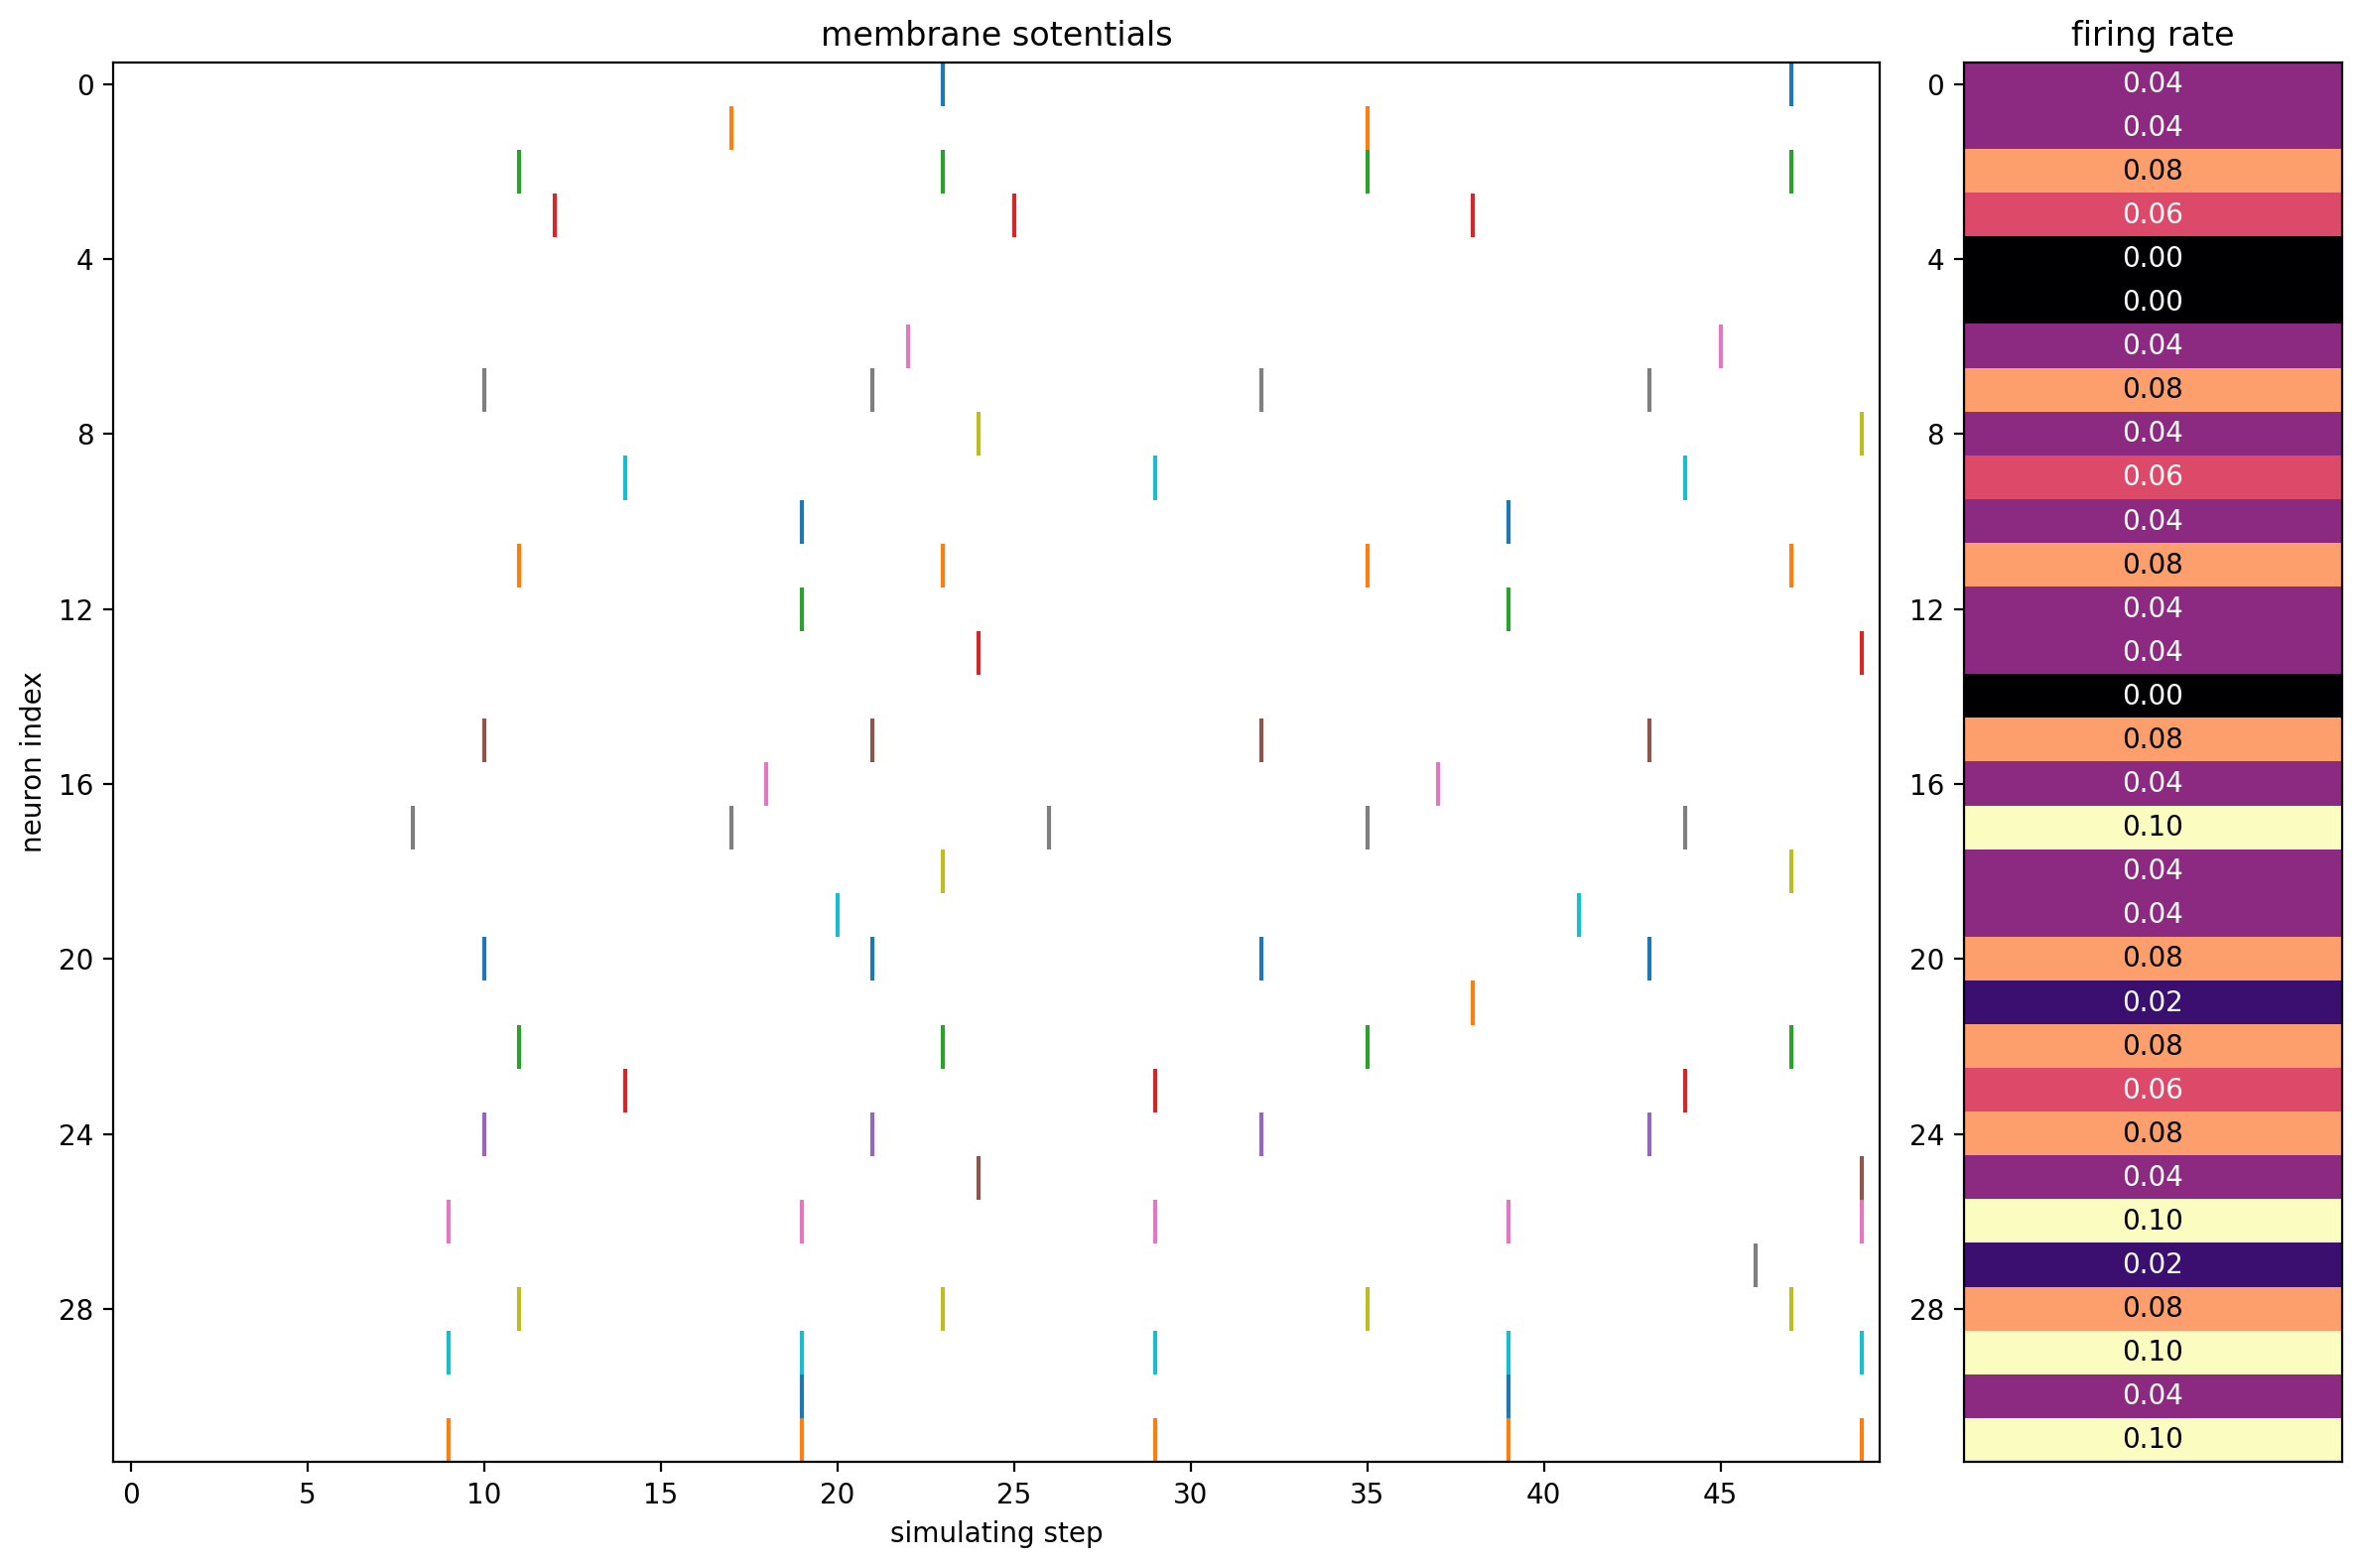

In [5]:
if_layer.reset()
T = 50
x = torch.rand([32]) / 8.
s_list = []
v_list = []
for t in range(T):
    s_list.append(if_layer(x).unsqueeze(0))
    v_list.append(if_layer.v.unsqueeze(0))

s_list = torch.cat(s_list)
v_list = torch.cat(v_list)

figsize = (12, 8)
dpi = 200
visualizing.plot_2d_heatmap(array=v_list.numpy(), title='membrane potentials', xlabel='simulating step',
                            ylabel='neuron index', int_x_ticks=True, x_max=T, figsize=figsize, dpi=dpi)


visualizing.plot_1d_spikes(spikes=s_list.numpy(), title='membrane sotentials', xlabel='simulating step',
                        ylabel='neuron index', figsize=figsize, dpi=dpi)

plt.show()

In [6]:
if_layer = neuron.IFNode()
print(f'if_layer.backend={if_layer.backend}')
# if_layer.backend=torch

print(f'step_mode={if_layer.step_mode}, supported_backends={if_layer.supported_backends}')
# step_mode=s, supported_backends=('torch',)


if_layer.step_mode = 'm'
print(f'step_mode={if_layer.step_mode}, supported_backends={if_layer.supported_backends}')
# step_mode=m, supported_backends=('torch', 'cupy')

device = 'cuda:0'
if_layer.to(device)
if_layer.backend = 'cupy'  # switch to the cupy backend
print(f'if_layer.backend={if_layer.backend}')
# if_layer.backend=cupy

x_seq = torch.rand([8, 4], device=device)
y_seq = if_layer(x_seq)
if_layer.reset()

if_layer.backend=torch
step_mode=s, supported_backends=('torch',)
step_mode=m, supported_backends=('torch', 'cupy')
if_layer.backend=cupy
